In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import tkinter as tk
from tkinter import ttk
from datetime import datetime
from datetime import timedelta
from IPython.display import clear_output

In [2]:
growth_data_path = "F:\\Farm Data\Growth Model\growth_db.csv"
weather_data_path = "F:\\Farm Data\Growth Model\weather_db.csv"
field_data_path = "F:\\Farm Data\Growth Model\\field_db.csv"
growth_data = pd.read_csv(growth_data_path)
weather_data = pd.read_csv(weather_data_path)
field_data = pd.read_csv(field_data_path)
test_2 = 'test_2'

In [3]:
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d/%m/%Y')
weather_data['time'] = pd.to_datetime(weather_data['time'], format='%H:%M:%S')
weather_data['day'] = weather_data.date.dt.day
weather_data['month'] = weather_data.date.dt.month
weather_data['day_month'] = weather_data['day'].astype(str) + " - " + weather_data['month'].astype(str)

min_grow_temp = 5

weather_data['heat_units'] = weather_data['avg_temp'] - min_grow_temp
weather_data['heat_units'] = np.where((weather_data['heat_units'] < 0), 0, weather_data['heat_units']/24)

In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61512 entries, 0 to 61511
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61512 non-null  datetime64[ns]
 1   time             61512 non-null  datetime64[ns]
 2   avg_temp         61512 non-null  float64       
 3   rh               61512 non-null  float64       
 4   rain             61512 non-null  float64       
 5   solar_radiation  61512 non-null  int64         
 6   wind_speed       60962 non-null  float64       
 7   bat_volt         60962 non-null  float64       
 8   leaf_wet         60962 non-null  float64       
 9   dew_point        60962 non-null  float64       
 10  day              61512 non-null  int64         
 11  month            61512 non-null  int64         
 12  day_month        61512 non-null  object        
 13  heat_units       61512 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int6

In [5]:
weather_data.head()

,date,time,avg_temp,rh,rain,solar_radiation,wind_speed,bat_volt,leaf_wet,dew_point,day,month,day_month,heat_units
0,2014-05-14,1900-01-01 14:00:00,16.2,55.9,0.0,205,2.7,6904.0,0.0,7.2,14,5,14 - 5,0.466667
1,2014-05-14,1900-01-01 15:00:00,17.4,51.2,0.0,544,2.2,6952.0,0.0,7.0,14,5,14 - 5,0.516667
2,2014-05-14,1900-01-01 16:00:00,17.7,48.9,0.0,387,2.1,6922.0,0.0,6.6,14,5,14 - 5,0.529167
3,2014-05-14,1900-01-01 17:00:00,17.9,48.9,0.0,274,2.0,6904.0,0.0,6.7,14,5,14 - 5,0.537500
4,2014-05-14,1900-01-01 18:00:00,17.2,51.0,0.0,104,1.7,6894.0,0.0,6.7,14,5,14 - 5,0.508333


In [6]:
growth_data['sample_date'] = pd.to_datetime(growth_data['sample_date'], format='%d/%m/%Y')
growth_data['fieldzone'] = growth_data["field"] + growth_data["zone"].astype(str)

summary_data = growth_data

In [7]:
growth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74590 entries, 0 to 74589
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sample_date  74590 non-null  datetime64[ns]
 1   field        74590 non-null  object        
 2   zone         74590 non-null  int64         
 3   diameter     74590 non-null  float64       
 4   fieldzone    74590 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
growth_data.head()

,sample_date,field,zone,diameter,fieldzone
0,2019-07-17,Allans 18,1,4.0,Allans 181
1,2019-07-17,Allans 18,1,3.0,Allans 181
2,2019-07-17,Allans 18,1,5.0,Allans 181
3,2019-07-17,Allans 18,1,5.0,Allans 181
4,2019-07-17,Allans 18,1,3.0,Allans 181


In [9]:
field_data['planting_date'] = pd.to_datetime(field_data['planting_date'], format='%d/%m/%Y')
field_data["zone"] = field_data["zone"].astype(str)
field_data["fieldzone"] = field_data["field"] + field_data["zone"]

In [10]:
field_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   field             497 non-null    object        
 1   zone              497 non-null    object        
 2   planting_date     497 non-null    datetime64[ns]
 3   variety           497 non-null    object        
 4   method            497 non-null    object        
 5   inputs            497 non-null    object        
 6   protection        497 non-null    object        
 7   planting_rate     497 non-null    int64         
 8   sand              497 non-null    int64         
 9   silt              497 non-null    int64         
 10  clay              497 non-null    int64         
 11  organic_matter    497 non-null    float64       
 12  est_harvest_date  497 non-null    object        
 13  fieldzone         497 non-null    object        
dtypes: datetime64[ns](1), floa

In [11]:
field_data.head()

,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,est_harvest_date,fieldzone
0,Allans 07,1,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2021,Allans 071
1,Allans 07,2,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2021,Allans 072
2,Allans 07,3,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,15/12/2021,Allans 073
3,Allans 07,4,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,15/12/2021,Allans 074
4,Allans 07,5,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,15/12/2021,Allans 075


In [12]:
summary_data["zone"] = summary_data["zone"].astype(str)
summary_data["fieldzone"] = summary_data["field"] + summary_data["zone"]
summary_data['fieldzonedate'] = summary_data['fieldzone'] + summary_data['sample_date'].astype(str)

summary_data = summary_data.set_index('fieldzone').join(field_data.set_index('fieldzone'), rsuffix = '_join')

summary_data['heat_units'] = 0
summary_data['solar_radiation'] = 0

In [13]:
summary_data = summary_data.reset_index(inplace=False)
summary_data = summary_data.drop(columns=['field_join', 'zone_join'], inplace=False)

In [14]:
def cum_heat_units(start, finish, weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['heat_units']]
    total_hu = df['heat_units'].sum()
    return total_hu

def cum_solar_radiation(start, finish, weather_data = weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['solar_radiation']]
    total_sr = df['solar_radiation'].sum()
    return total_sr

In [15]:
summary_data.head()

,fieldzone,sample_date,field,zone,diameter,fieldzonedate,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,est_harvest_date,heat_units,solar_radiation
0,Allans 071,2019-07-18,Allans 07,1,3.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2021,0,0
1,Allans 071,2019-07-18,Allans 07,1,9.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2021,0,0
2,Allans 071,2019-07-18,Allans 07,1,9.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2021,0,0
3,Allans 071,2019-07-18,Allans 07,1,8.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2021,0,0
4,Allans 071,2019-07-18,Allans 07,1,12.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,15/12/2021,0,0


In [16]:
summary_data_avg = summary_data.groupby(['fieldzonedate']).agg({'diameter' : ['mean', 'std', 'count'],
                                                                'method' : ['first'],
                                                                'inputs' : ['first'],
                                                                'variety' : ['first'],
                                                                'protection' : ['first'],
                                                                'sand' : ['mean'],
                                                                'silt' : ['mean'],
                                                                'clay' : ['mean'],
                                                                'organic_matter' : ['mean'],
                                                                'planting_date' : ['first'],
                                                                'sample_date' : ['first'],
                                                                'fieldzone' : ['first']}).reset_index()

summary_data_avg.columns = ['fieldzonedate',
                            'mean_diameter',
                            'std_dev_diameter',
                            'pp2m2', 'method',
                            'inputs',
                            'variety',
                            'protection',
                            'sand',
                            'silt',
                            'clay',
                            'organic_matter',
                            'planting_date',
                            'sample_date',
                            'fieldzone']

stripping_coef = 0.92

summary_data_avg['d_lin'] = (summary_data_avg['mean_diameter']*stripping_coef)**0.625
summary_data_avg['heat_units'] = 0
summary_data_avg['solar_radiation'] = 0

summary_data_avg.head()

,fieldzonedate,mean_diameter,std_dev_diameter,pp2m2,method,inputs,variety,protection,sand,silt,clay,organic_matter,planting_date,sample_date,fieldzone,d_lin,heat_units,solar_radiation
0,Allans 0712019-07-18,7.266667,3.387141,45,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-07-18,Allans 071,3.278702,0,0
1,Allans 0712019-08-29,20.673913,5.865357,46,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-08-29,Allans 071,6.302409,0,0
2,Allans 0712019-10-29,38.095238,8.014650,42,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-10-29,Allans 071,9.234461,0,0
3,Allans 0712020-01-13,38.283333,11.416225,42,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2020-01-13,Allans 071,9.262932,0,0
4,Allans 0722019-07-18,7.106383,2.837896,47,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-07-18,Allans 072,3.233313,0,0


In [17]:
weather_data_avg = weather_data.groupby(['date']).agg({'rain' : ['sum'],
                                                       'heat_units' : ['sum'],
                                                       'solar_radiation' : ['sum'],
                                                       'wind_speed' : ['mean'],
                                                       'rh' : ['mean'],
                                                       'avg_temp' : ['mean']}).reset_index()

weather_data_avg.columns = ['date',
                            'rain',
                            'heat_units',
                            'solar_radiation',
                            'wind_speed',
                            'rh',
                            'avg_temp']

weather_data_avg['day'] = weather_data_avg.date.dt.day
weather_data_avg['month'] = weather_data_avg.date.dt.month
weather_data_avg['day_month'] = weather_data_avg['day'].astype(str) + " - " + weather_data_avg['month'].astype(str)  

weather_data_avg_group = weather_data_avg.groupby(['day_month']).agg({'rain' : ['mean'],
                                                                      'heat_units' : ['mean'],
                                                                      'solar_radiation' : ['mean'],
                                                                      'wind_speed' : ['mean'],
                                                                      'rh' : ['mean'],
                                                                      'avg_temp' : ['mean']}).reset_index()
weather_data_avg_group.columns = ['day_month',
                                  'rain',
                                  'heat_units',
                                  'solar_radiation',
                                  'wind_speed',
                                  'rh',
                                  'avg_temp']

max_date = max(weather_data_avg.date)

for i in range(1, 500):
    
    clear_output(wait=True)
    
    date = max_date + timedelta(days=i)
    weather_data_avg = weather_data_avg.append({'date': date,
                                                'rain': np.nan,
                                                'heat_units':np.nan,
                                                'solar_radiation':np.nan,
                                                'wind_speed':np.nan,
                                                'rh':np.nan,
                                                'avg_temp':np.nan }, ignore_index=True)
    
    print("Current Progress:", np.round(i/500*100,0),"%")
    
weather_data_avg['day'] = weather_data_avg.date.dt.day
weather_data_avg['month'] = weather_data_avg.date.dt.month
weather_data_avg['day_month'] = weather_data_avg['day'].astype(str) + " - " + weather_data_avg['month'].astype(str)  

Current Progress: 100.0 %


In [ ]:
def mean_weather(day_month, variable):
    
    df = weather_data_avg_group[weather_data_avg_group['day_month']==day_month]
    weather_value = df[variable].sum()
    return weather_value

for variable in ['rain', 'heat_units', 'solar_radiation', 'wind_speed', 'rh', 'avg_temp']:
    for i in weather_data_avg.index:
        clear_output(wait=True)
        if weather_data_avg[variable][i] == np.nan:
            test = 'test'
        else:
            day_month = weather_data_avg['day_month'][i]
            weather_data_avg[variable][i] = mean_weather(day_month, variable)
        print(f"{variable} progress:", np.round(i/len(weather_data_avg)*100,0),"%")
    
weather_data_avg

avg_temp progress: 91.0 %


In [19]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['heat_units'][i] = cum_heat_units(planting_date, sample_date, weather_data_avg)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


In [20]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['solar_radiation'][i] = cum_solar_radiation(planting_date, sample_date, weather_data_avg)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


In [21]:
X = summary_data_avg.drop(['d_lin',
                           'mean_diameter',
                           'std_dev_diameter',
                           'fieldzonedate',
                           'sample_date',
                           'planting_date',
                           'sand',
                           'silt',
                           'clay',
                           'fieldzone'], axis = 1)

y = summary_data_avg['d_lin']

In [22]:
X = pd.get_dummies(X, columns = ['method',
                                 'inputs',
                                 'variety',
                                 'protection'], drop_first = True)

In [23]:
from sklearn.ensemble import IsolationForest

print(f"The old training dataframe shape: {X.shape}")

iso = IsolationForest(random_state = 10)
preds = iso.fit_predict(X)

totalOutliers=0

for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
        
print("Total number of outliers identified is: ",totalOutliers)

The old training dataframe shape: (1870, 37)
Total number of outliers identified is:  66


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

reg = LinearRegression().fit(X_scaled, y)
preds = reg.predict(X_scaled)
summary_data_avg['preds'] = preds
reg.score(X_scaled, y)

0.8846106757349212

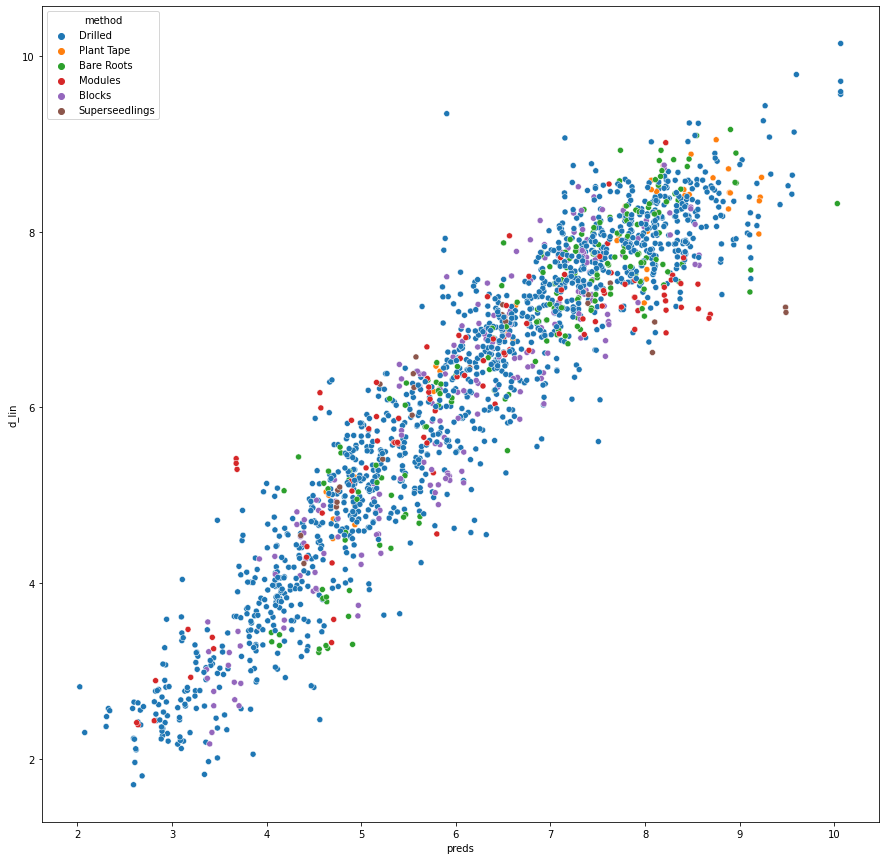

In [25]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'd_lin', data = summary_data_avg, hue = 'method')
plt.show()

In [26]:
coef_list = list(reg.coef_)
var_list = list(X)

reg_coef_df = pd.DataFrame({'variable': var_list,
                            'coef': coef_list}, columns=['variable',
                                                         'coef'])

reg_coef_df

,variable,coef
0,pp2m2,-0.044897
1,organic_matter,0.461249
2,heat_units,0.757770
3,solar_radiation,1.452342
4,method_Blocks,-0.410453
5,method_Drilled,-1.739872
6,method_Modules,-0.066601
7,method_Plant Tape,-0.255636
8,method_Superseedlings,-0.088787
9,inputs_Conventional,0.267187


In [27]:
X_1 = summary_data_avg.drop(['d_lin',
                             'mean_diameter',
                             'std_dev_diameter',
                             'fieldzonedate',
                             'sample_date',
                             'planting_date',
                             'preds',
                             'sand',
                             'silt',
                             'clay',
                             'fieldzone'], axis = 1)

X_1['growth_units'] = X_1['solar_radiation']*X_1['heat_units']

X_1 = X_1.drop(['heat_units',
                'solar_radiation'], axis = 1)

y_1 = summary_data_avg['mean_diameter']

In [28]:
X_1 = pd.get_dummies(X_1, columns = ['method',
                                     'inputs',
                                     'variety',
                                     'protection'], drop_first = True)

In [29]:
X_1_scaled = scaler.fit_transform(X_1)

reg = LinearRegression().fit(X_1_scaled, y_1)
preds = reg.predict(X_1_scaled)

summary_data_avg['preds'] = preds

reg.score(X_1_scaled, y_1)

0.8265834267007701

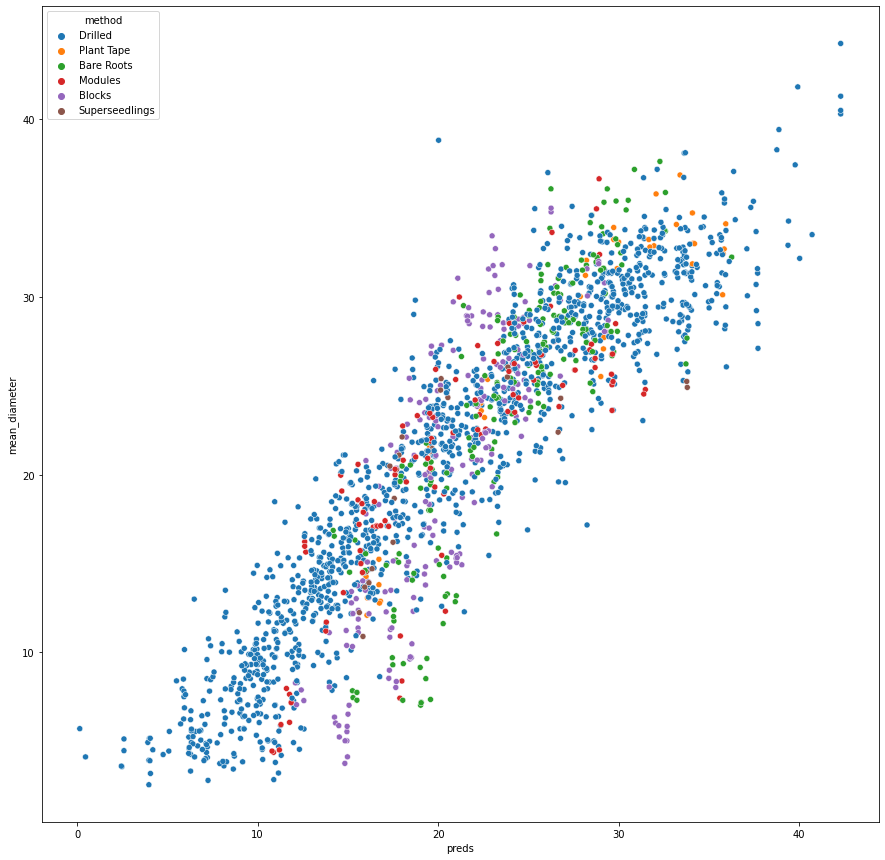

In [30]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'mean_diameter', data = summary_data_avg, hue = 'method')
plt.show()

In [31]:
coef_list = list(reg.coef_)
var_list = list(X_1)

reg_coef_df = pd.DataFrame({'variable': var_list, 'coef': coef_list}, columns=['variable', 'coef'])

reg_coef_df

,variable,coef
0,pp2m2,-0.272725
1,organic_matter,2.379607
2,growth_units,9.930332
3,method_Blocks,-2.064079
4,method_Drilled,-7.112876
5,method_Modules,-0.422587
6,method_Plant Tape,-0.887226
7,method_Superseedlings,-0.462769
8,inputs_Conventional,1.537173
9,inputs_Organic,0.723807


In [32]:
def filter_data(method, inputs, variety, protection):
    
    filtered = summary_data_avg[data['variety'].str.contains(variety)]
    filtered = filtered[filtered['inputs'].str.contains(inputs)]
    filtered = filtered[filtered['protection'].str.contains(protection)]
    filtered = filtered[filtered['method'].str.contains(method)]
    
    return filtered

In [33]:
def predict_weather(start, finish, variable):
    
    df = weather_data_avg.loc[(weather_data_avg['date'] > start) & (weather_data_avg['date'] < finish), [variable]]
    pred_hu = df['heat_units'].sum()
    
    return pred_hu

In [39]:
def average_count(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    average_count = df['pp2m2'].mean()
    
    return average_count

average_count('Allans 185')

43.0

In [40]:
field_data['avg_pp2m2'] = 0

for i in field_data.index:
    
    clear_output(wait=True)
    
    fieldzone = field_data['fieldzone'][i]
    field_data['avg_pp2m2'][i] = average_count(fieldzone)
    
    print("Current Progress:", np.round(i/len(field_data)*100,0),"%")
    
field_data[300:350]

Current Progress: 100.0 %


,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,est_harvest_date,fieldzone,avg_pp2m2
300,Park Farm 68,4,2020-04-14,Krypton,Drilled,Conventional,Barley,250203,36,42,22,50.3,05/11/2020,Park Farm 684,45.000000
301,RH34/35A,1,2020-05-06,Chiefton,Drilled,Conventional,None,265087,38,49,13,2.9,07/04/2021,RH34/35A1,30.000000
302,RH34/35A,10,2020-05-08,Stromboli,Drilled,Conventional,None,303922,38,49,13,2.9,07/04/2021,RH34/35A10,26.142857
303,RH34/35A,11,2020-05-08,Triton,Drilled,Conventional,None,258621,38,49,13,2.9,07/04/2021,RH34/35A11,23.500000
304,RH34/35A,12,2020-05-08,Triton,Drilled,Conventional,None,278018,38,49,13,2.9,07/04/2021,RH34/35A12,27.000000
305,RH34/35A,2,2020-05-06,Chiefton,Drilled,Conventional,None,265087,38,49,13,2.9,07/04/2021,RH34/35A2,33.166667
306,RH34/35A,3,2020-05-06,Chiefton,Drilled,Conventional,None,265087,38,49,13,2.9,07/04/2021,RH34/35A3,31.666667
307,RH34/35A,4,2020-05-07,Chiefton,Drilled,Conventional,None,265087,38,49,13,2.9,07/04/2021,RH34/35A4,30.333333
308,RH34/35A,5,2020-05-07,Chiefton,Drilled,Conventional,None,265087,38,49,13,2.9,07/04/2021,RH34/35A5,31.833333
309,RH34/35A,6,2020-05-07,Chiefton,Drilled,Conventional,None,265087,38,49,13,2.9,07/04/2021,RH34/35A6,29.333333
